In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_feather('/content/drive/MyDrive/Capstone Project/04 Deliverables/04 Data/transactions.feather')

In [ ]:
clv_df = pd.read_feather('/content/drive/MyDrive/Capstone Project/04 Deliverables/04 Data/final_clv_improved.feather')

In [ ]:
df = df.merge(clv_df, how='left', on='client_id')

In [ ]:
df = df[df['return'] == 0]

In [ ]:
df.columns

Index(['date_order', 'date_invoice', 'product_id', 'client_id', 'sales_net',
       'quantity', 'order_channel', 'branch_id', 'price', 'inv_is_order',
       'return', 'day', 'weekend', 'month', 'quarter', 'year', 'cohort',
       'total_clv'],
      dtype='object')

In [ ]:
df.drop(columns=['product_id', 'branch_id', 'inv_is_order','return', 'day', 'weekend', 'month', 'quarter', 'year', 'cohort',], inplace=True)

In [ ]:
df.head()

,date_order,date_invoice,client_id,sales_net,quantity,order_channel,price,total_clv
0,2017-09-25,2017-09-25,188502,155.44320,3,online,51.81440,10252.368295
1,2017-09-25,2017-09-25,835089,16.39440,3,at the store,5.46480,22147.335214
2,2017-09-25,2017-09-25,1977896,365.76624,21,online,17.41744,40628.126052
3,2017-09-25,2017-09-25,598816,8.59878,201,at the store,0.04278,12432.823624
4,2017-09-25,2017-09-25,2086861,1093.37400,3,by phone,364.45800,3576.371961


In [ ]:
df["price_cat"] = pd.cut(x=df['price'], bins = [0, 50, 1000, 500000], labels=[1,2,3])

In [ ]:
df['DSO'] = (df.date_invoice-df.date_order).astype('timedelta64[D]')

In [ ]:
channel_pivot = pd.DataFrame(df.pivot_table(index='client_id', columns='order_channel', values='sales_net', aggfunc='sum'))
channel_pivot.head()

order_channel,at the store,by phone,during the visit of a sales rep,online,other
client_id,,,,,
6,1318.594324,4.563639e+03,0.0,0.000000,0.0
7,1190.777083,0.000000e+00,0.0,0.000000,0.0
14,60710.722049,2.609452e+06,0.0,484767.074776,0.0
18,91558.217305,1.427681e+05,0.0,11301.395000,0.0
25,374.586096,0.000000e+00,0.0,0.000000,0.0


In [ ]:
cat_pivot = df.pivot_table(index='client_id', columns='price_cat', values='sales_net', aggfunc='sum')
cat_pivot.head()

price_cat,1,2,3
client_id,,,
6,5.122736e+03,7.594968e+02,0.0000
7,1.190777e+03,0.000000e+00,0.0000
14,1.573222e+06,1.440274e+06,141433.8862
18,1.067484e+05,1.274722e+05,11407.1076
25,3.745861e+02,0.000000e+00,0.0000


In [ ]:
df = df.merge(channel_pivot.reset_index(),how='left', on='client_id')

In [ ]:
df = df.merge(cat_pivot.reset_index(),how='left', on='client_id')

In [ ]:
df.head()

,date_order,date_invoice,client_id,sales_net,quantity,order_channel,price,total_clv,price_cat,DSO,at the store,by phone,during the visit of a sales rep,online,other,1,2,3
0,2017-09-25,2017-09-25,188502,155.44320,3,online,51.81440,10252.368295,2,0.0,637.615200,16184.842435,0.0,50931.993915,0.1656,46272.911550,21481.705600,0.0000
1,2017-09-25,2017-09-25,835089,16.39440,3,at the store,5.46480,22147.335214,1,0.0,126840.267745,177518.416862,0.0,0.000000,3245.7600,124691.377359,182913.067249,0.0000
2,2017-09-25,2017-09-25,1977896,365.76624,21,online,17.41744,40628.126052,1,0.0,2608.736667,8019.204073,0.0,137065.804776,0.0000,73641.250919,65405.331796,8647.1628
3,2017-09-25,2017-09-25,598816,8.59878,201,at the store,0.04278,12432.823624,1,0.0,203629.837998,28561.640422,0.0,0.000000,0.0000,175519.498354,56671.980067,0.0000
4,2017-09-25,2017-09-25,2086861,1093.37400,3,by phone,364.45800,3576.371961,2,0.0,15199.435423,26510.436022,0.0,0.000000,0.0000,23160.930498,18548.940947,0.0000


In [ ]:
print(df.columns)

Index([                     'date_order',                    'date_invoice',
                             'client_id',                       'sales_net',
                              'quantity',                   'order_channel',
                                 'price',                       'total_clv',
                             'price_cat',                             'DSO',
                          'at the store',                        'by phone',
       'during the visit of a sales rep',                          'online',
                                 'other',                                 1,
                                       2,                                 3],
      dtype='object')


In [ ]:
df.columns = ['date_order','date_invoice', 'client_id','sales_net', 'quantity','order_channel', 'price','total_clv',\
              'price_cat','DSO', 'store','phone','sales_rep','online','other','p_1','p_2','p_3']

In [ ]:
client_df = df.groupby('client_id').agg(sales=('sales_net','sum'),quant=('quantity', 'sum'), clv=('total_clv', 'mean'), store=('store', 'first'),\
                                        phone=('phone', 'first'), sales_rep=('sales_rep', 'first'), online=('online', 'first'), other=('other', 'first'),\
                                        p_1=('p_1', 'first'), p_2=('p_2', 'first'), p_3=('p_3', 'first'),\
                                        DSO=('DSO', 'mean'))

In [ ]:
client_df['avg_price'] = client_df.sales / client_df.quant

In [ ]:
client_df.head()

,sales,quant,clv,store,phone,sales_rep,online,other,p_1,p_2,p_3,DSO,avg_price
client_id,,,,,,,,,,,,,
6,5.882233e+03,3038,595.276379,1318.594324,4.563639e+03,0.0,0.000000,0.0,5.122736e+03,7.594968e+02,0.0000,0.000000,1.936219
7,1.190777e+03,99,503.051995,1190.777083,0.000000e+00,0.0,0.000000,0.0,1.190777e+03,0.000000e+00,0.0000,0.000000,12.028051
14,3.154930e+06,1389195,252327.045782,60710.722049,2.609452e+06,0.0,484767.074776,0.0,1.573222e+06,1.440274e+06,141433.8862,2.653164,2.271049
18,2.456277e+05,70132,19577.909663,91558.217305,1.427681e+05,0.0,11301.395000,0.0,1.067484e+05,1.274722e+05,11407.1076,2.362717,3.502362
25,3.745861e+02,108,NaN,374.586096,0.000000e+00,0.0,0.000000,0.0,3.745861e+02,0.000000e+00,0.0000,0.000000,3.468390


In [ ]:
for i in range(3,11):
  client_df.iloc[:,i] = client_df.iloc[:,i] / client_df.iloc[:,0]

In [ ]:
client_df.fillna(0, inplace=True)

In [ ]:
client_df.head()

,sales,quant,clv,store,phone,sales_rep,online,other,p_1,p_2,p_3,DSO,avg_price
client_id,,,,,,,,,,,,,
6,5.882233e+03,3038,595.276379,0.224166,0.775834,0.0,0.000000,0.0,0.870883,0.129117,0.000000,0.000000,1.936219
7,1.190777e+03,99,503.051995,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,12.028051
14,3.154930e+06,1389195,252327.045782,0.019243,0.827103,0.0,0.153654,0.0,0.498655,0.456515,0.044829,2.653164,2.271049
18,2.456277e+05,70132,19577.909663,0.372752,0.581238,0.0,0.046010,0.0,0.434594,0.518965,0.046441,2.362717,3.502362
25,3.745861e+02,108,0.000000,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,3.468390


In [ ]:
for i in range(1,4):
  client_df['only_'+str(i)] = client_df['p_'+str(i)] == 1
  client_df['only_'+str(i)] = client_df['only_'+str(i)].astype(int)

In [ ]:
variations = {'1&2':['1', '2'], '2&3':['2','3'], '1&3':['1','3'], '1&2&3':['1','2','3']}
for key, value in variations.items():
  if len(value) == 2:
    client_df[key] = (client_df['p_'+value[0]] != 0) & (client_df['p_'+value[1]] != 0) & ((client_df['p_'+value[0]] + client_df['p_'+value[1]]) == 1)
    client_df[key] = client_df[key].astype(int)
  if len(value) == 3:
    client_df[key] = (client_df['p_'+value[0]] != 0) & (client_df['p_'+value[1]] != 0) & (client_df['p_'+value[2]] != 0)
    client_df[key] = client_df[key].astype(int)

In [ ]:
client_df.fillna(0, inplace=True)
client_df.head()

,sales,quant,clv,store,phone,sales_rep,online,other,p_1,p_2,p_3,DSO,avg_price,only_1,only_2,only_3,1&2,2&3,1&3,1&2&3
client_id,,,,,,,,,,,,,,,,,,,,
6,5.882233e+03,3038,595.276379,0.224166,0.775834,0.0,0.000000,0.0,0.870883,0.129117,0.000000,0.000000,1.936219,0,0,0,1,0,0,0
7,1.190777e+03,99,503.051995,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,12.028051,1,0,0,0,0,0,0
14,3.154930e+06,1389195,252327.045782,0.019243,0.827103,0.0,0.153654,0.0,0.498655,0.456515,0.044829,2.653164,2.271049,0,0,0,0,0,0,1
18,2.456277e+05,70132,19577.909663,0.372752,0.581238,0.0,0.046010,0.0,0.434594,0.518965,0.046441,2.362717,3.502362,0,0,0,0,0,0,1
25,3.745861e+02,108,0.000000,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,3.468390,1,0,0,0,0,0,0


In [ ]:
client_df.reset_index().to_feather('/content/drive/MyDrive/Capstone Project/04 Deliverables/04 Data/clients_for_segments.feather')

In [ ]:
client_df.reset_index().to_excel('/content/drive/MyDrive/Capstone Project04 Deliverables/04 Data/clients_for_segments.xlsx')

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer

In [ ]:
client_df['quant'] = client_df['quant'].astype(int)

In [ ]:
client_df.dtypes

sales        float64
quant          int64
clv          float64
store        float64
phone        float64
sales_rep    float64
online       float64
other        float64
p_1          float64
p_2          float64
p_3          float64
DSO          float64
avg_price    float64
only_1         int64
only_2         int64
only_3         int64
1&2            int64
2&3            int64
1&3            int64
1&2&3          int64
dtype: object

In [ ]:
client_df

,sales,quant,clv,store,phone,sales_rep,online,other,p_1,p_2,p_3,DSO,avg_price,only_1,only_2,only_3,1&2,2&3,1&3,1&2&3
client_id,,,,,,,,,,,,,,,,,,,,
6,5.882233e+03,3038,595.276379,0.224166,0.775834,0.0,0.000000,0.0,0.870883,0.129117,0.000000,0.000000,1.936219,0,0,0,1,0,0,0
7,1.190777e+03,99,503.051995,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,12.028051,1,0,0,0,0,0,0
14,3.154930e+06,1389195,252327.045782,0.019243,0.827103,0.0,0.153654,0.0,0.498655,0.456515,0.044829,2.653164,2.271049,0,0,0,0,0,0,1
18,2.456277e+05,70132,19577.909663,0.372752,0.581238,0.0,0.046010,0.0,0.434594,0.518965,0.046441,2.362717,3.502362,0,0,0,0,0,0,1
25,3.745861e+02,108,0.000000,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,3.468390,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2274456,1.542821e+03,776,17730.768369,0.921702,0.078298,0.0,0.000000,0.0,0.819533,0.180467,0.000000,6.727273,1.988171,0,0,0,1,0,0,0
2274479,4.959214e+02,34,61.264761,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,14.585924,1,0,0,0,0,0,0
2274504,1.132566e+02,14,16.947708,0.781284,0.218716,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,8.089757,1,0,0,0,0,0,0


In [ ]:
client_df[np.isfinite(client_df) == False] = 0

In [ ]:
scaler = StandardScaler()
transformer = PowerTransformer()
all_clients_df = scaler.fit_transform(client_df)
all_clients_df = transformer.fit_transform(all_clients_df)

In [ ]:
model = KMeans(5, random_state = 42)
model.fit(all_clients_df)

KMeans(n_clusters=5, random_state=42)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
sil_score = silhouette_score(all_clients_df, model.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % sil_score)

Silhouette Score: 0.244


### Conservative core clients

In [ ]:
core_df = pd.read_excel('/content/drive/MyDrive/Capstone Project/04 Deliverables/04 Data/P1_Cons Core.xlsx')

In [ ]:
core_df = core_df.merge(client_df.reset_index(), how='left', on='client_id')
core_df.head()

,client_id,sales,quant,clv,store,phone,sales_rep,online,other,p_1,...,p_3,DSO,avg_price,only_1,only_2,only_3,1&2,2&3,1&3,1&2&3
0,417576,2.757632e+07,10903711,2.031742e+06,0.165807,0.834176,0.000017,0.000000,0.000000,0.406091,...,0.078712,1.238358,2.529076,0,0,0,0,0,0,1
1,1773169,2.699176e+07,44184997,1.746691e+06,0.149588,0.795545,0.000000,0.054867,0.000000,0.653855,...,0.041019,3.003719,0.610881,0,0,0,0,0,0,1
2,2207247,1.134233e+07,3141320,7.510536e+05,0.009943,0.990008,0.000000,0.000000,0.000049,0.548587,...,0.011090,4.715912,3.610688,0,0,0,0,0,0,1
3,31213,1.041284e+07,817382,9.608538e+05,0.004338,0.995611,0.000000,0.000000,0.000051,0.018898,...,0.056045,10.693194,12.739255,0,0,0,0,0,0,1
4,324012,9.705075e+06,1746809,8.041596e+05,0.265698,0.734302,0.000000,0.000000,0.000000,0.237472,...,0.151208,2.285879,5.555888,0,0,0,0,0,0,1


In [ ]:
core_df.dtypes

client_id      int64
sales        float64
quant          int64
clv          float64
store        float64
phone        float64
sales_rep    float64
online       float64
other        float64
p_1          float64
p_2          float64
p_3          float64
DSO          float64
avg_price    float64
only_1         int64
only_2         int64
only_3         int64
1&2            int64
2&3            int64
1&3            int64
1&2&3          int64
dtype: object

In [ ]:
scaler = StandardScaler()
transformer = PowerTransformer()
#scaled_core_df = scaler.fit_transform(core_df)
scaled_core_df = transformer.fit_transform(core_df)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


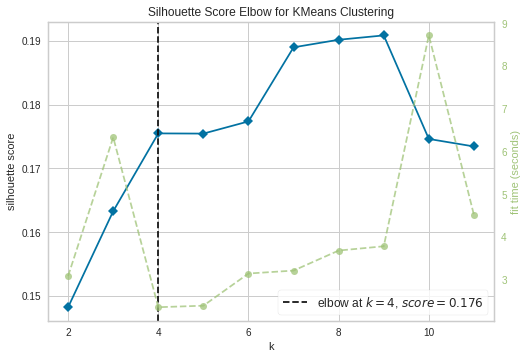

In [ ]:
# define a model: most proper for RFM analysis is K-means
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric = 'silhouette') # was 12
visualizer.fit(scaled_core_df)  
visualizer.show()

In [ ]:
"""
# developing the clusters
model = KMeans(3, random_state = 42) 
model.fit(scaled_core_df)
clusters_core_clients = scaled_core_df.copy()
clusters_core_clients['cluster_pred']=model.labels_

print(" Our cluster centers are as follows")
print(model.cluster_centers_)
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="cluster_pred", data=clusters_core_clients, palette="Greens")
clusters_core_clients.groupby(['cluster_pred']).count()
"""

'\n# developing the clusters\nmodel = KMeans(3, random_state = 42) \nmodel.fit(scaled_core_df)\nclusters_core_clients = scaled_core_df.copy()\nclusters_core_clients[\'cluster_pred\']=model.labels_\n\nprint(" Our cluster centers are as follows")\nprint(model.cluster_centers_)\nf, ax = plt.subplots(figsize=(25, 5))\nax = sns.countplot(x="cluster_pred", data=clusters_core_clients, palette="Greens")\nclusters_core_clients.groupby([\'cluster_pred\']).count()\n'

In [ ]:
model = KMeans(3, random_state = 42)
model.fit(scaled_core_df)

KMeans(n_clusters=3, random_state=42)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
sil_score = silhouette_score(scaled_core_df, model.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % sil_score)

Silhouette Score: 0.163


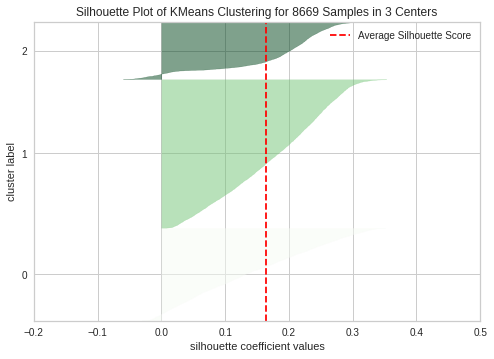

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ec2fda1d0>,
                     colors='Greens',
                     estimator=KMeans(n_clusters=3, random_state=42))

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer, silhouette_visualizer
silhouette_visualizer(KMeans(3, random_state = 42), scaled_core_df, colors = 'Greens')

In [ ]:
new_list = model.labels_

In [ ]:
core_df['cluster'] = new_list.tolist()

In [ ]:
core_df = core_df[["client_id","cluster"]]

In [ ]:
core_df.to_csv("/content/drive/MyDrive/Capstone Project/01 Data/01 EDA/Cluster_core.csv")

## Future digital clients

In [ ]:
digi_df = pd.read_excel('/content/drive/MyDrive/Capstone Project/01 Data/02 RFM/P2_Digital Future.xlsx')

In [ ]:
digi_df = digi_df.merge(client_df.reset_index(), how='left', on='client_id')
digi_df.head()

,client_id,sales,quant,clv,store,phone,sales_rep,online,other,p_1,...,p_3,DSO,avg_price,only_1,only_2,only_3,1&2,2&3,1&3,1&2&3
0,1552980,1.372731e+07,13123627,1.509416e+06,0.015160,0.279205,0.000000,0.705635,0.0,0.729698,...,0.012446,2.860236,1.046000,0,0,0,0,0,0,1
1,2212698,1.145727e+07,354619,2.184831e+06,0.028787,0.311901,0.000000,0.659312,0.0,0.078473,...,0.633467,29.382236,32.308661,0,0,0,0,0,0,1
2,1668756,7.896573e+06,8833412,8.893675e+05,0.050825,0.183256,0.000000,0.765918,0.0,0.750608,...,0.017187,3.525747,0.893944,0,0,0,0,0,0,1
3,1232507,7.253993e+06,5342413,8.619166e+05,0.059742,0.291461,0.004577,0.644219,0.0,0.577678,...,0.060090,5.267847,1.357812,0,0,0,0,0,0,1
4,1983214,6.157811e+06,10256910,6.771792e+05,0.001082,0.074708,0.000000,0.924210,0.0,0.922715,...,0.018114,3.030365,0.600357,0,0,0,0,0,0,1


In [ ]:
scaler = StandardScaler()
transformer = PowerTransformer()
#scaled_core_df = scaler.fit_transform(core_df)
scaled_digi_df = transformer.fit_transform(digi_df)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


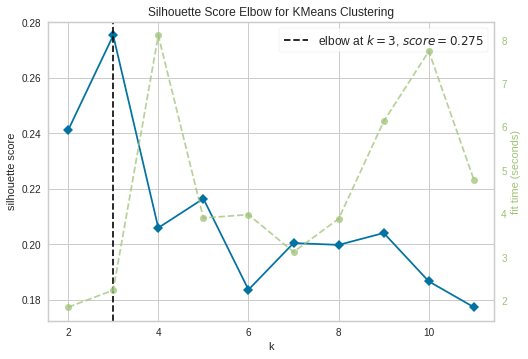

In [ ]:
# define a model: most proper for RFM analysis is K-means
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric = 'silhouette') # was 12
visualizer.fit(scaled_digi_df)  
visualizer.show()

In [ ]:
model = KMeans(3, random_state = 42)
model.fit(scaled_digi_df)

KMeans(n_clusters=3, random_state=42)

In [ ]:
new_list = model.labels_

In [ ]:
digi_df['cluster'] = new_list.tolist()

In [ ]:
# digi_df = digi_df[["client_id","cluster"]]

In [ ]:
digi_df

,client_id,sales,quant,clv,store,phone,sales_rep,online,other,p_1,...,DSO,avg_price,only_1,only_2,only_3,1&2,2&3,1&3,1&2&3,cluster
0,1552980,1.372731e+07,13123627,1.509416e+06,0.015160,0.279205,0.000000,0.705635,0.0,0.729698,...,2.860236,1.046000,0,0,0,0,0,0,1,2
1,2212698,1.145727e+07,354619,2.184831e+06,0.028787,0.311901,0.000000,0.659312,0.0,0.078473,...,29.382236,32.308661,0,0,0,0,0,0,1,2
2,1668756,7.896573e+06,8833412,8.893675e+05,0.050825,0.183256,0.000000,0.765918,0.0,0.750608,...,3.525747,0.893944,0,0,0,0,0,0,1,2
3,1232507,7.253993e+06,5342413,8.619166e+05,0.059742,0.291461,0.004577,0.644219,0.0,0.577678,...,5.267847,1.357812,0,0,0,0,0,0,1,2
4,1983214,6.157811e+06,10256910,6.771792e+05,0.001082,0.074708,0.000000,0.924210,0.0,0.922715,...,3.030365,0.600357,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3781,1086228,1.893360e+01,6,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,...,0.000000,3.155600,1,0,0,0,0,0,0,1
3782,827552,1.722240e+01,3,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,...,0.000000,5.740800,1,0,0,0,0,0,0,1
3783,446205,2.812891e+02,64,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,...,3.000000,4.395142,1,0,0,0,0,0,0,1
3784,1445117,8.784160e+00,11,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,...,0.000000,0.798560,1,0,0,0,0,0,0,1


In [ ]:
digi_df.to_csv("/content/drive/MyDrive/Capstone Project/04 Deliverables/04 Data/Cluster_digi.csv")

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
sil_score = silhouette_score(scaled_digi_df, model.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % sil_score)

Silhouette Score: 0.275
